## Surprise Housing

- Derive the significant factors for price of the house


### Step 1. Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
###import data and check
housing = pd.read_csv('train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 2. Perform EDA and Data Cleaning

In [4]:
### checking the data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
###checking percentage of missing values in data
dict1 = ((housing.isna().sum() / len(housing.index)) * 100)
dict1[dict1.values > 0.00].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [6]:
### Since there are lot of missing values. Checking the percentage of missing values for each column

### checking columns with very high misiing values 
high_missing_columns = housing.columns[((housing.isna().sum() / len(housing.index)) * 100)>80.0]
high_missing_columns

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [7]:
### Checking the data where this values are NA

housing[housing.Alley.isna() | housing.PoolQC.isna() | housing.Fence.isna() | housing.MiscFeature.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


>#### Sice this columns have very high no of missing values, this columns won't have significant value addition to the housing Sale Price and hence can be dropped 

>#### Dropping this Columns

In [8]:
housing = housing.drop(high_missing_columns,axis=1)

In [9]:
dict1 = ((housing.isna().sum() / len(housing.index)) * 100)
dict1[dict1.values > 0.00].sort_values(ascending=False)

FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

#### checking colum values one by one for its missing values

In [10]:
##Checking other related columns where FireplaceQu values are missing
housing[housing.FireplaceQu.isna()].Fireplaces


0       0
5       0
10      0
12      0
15      0
       ..
1452    0
1453    0
1454    0
1458    0
1459    0
Name: Fireplaces, Length: 690, dtype: int64

> #### Looking at data dictionary and FireplaceQu values and other related column data, it can be said that the missing values represents that fireplaces are not present
> #### Since this data is missing almost 47 % a well as the related feature Fireplace can explain about the same, we can drop this column.

In [11]:
housing = housing.drop(['FireplaceQu'], axis=1)

In [12]:
##checking missing values again
dict1 = ((housing.isna().sum() / len(housing.index)) * 100)
dict1[dict1.values > 0.00].sort_values(ascending=False)

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [13]:
## checking missing values in LotFrontage column
print(housing[housing.LotFrontage.isna()])

## checking related column MSZoning with LotFrontage column
print(housing[housing.LotFrontage.isna()].MSZoning.value_counts())

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
7        8          60       RL          NaN    10382   Pave      IR1   
12      13          20       RL          NaN    12968   Pave      IR2   
14      15          20       RL          NaN    10920   Pave      IR1   
16      17          20       RL          NaN    11241   Pave      IR1   
24      25          20       RL          NaN     8246   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1429  1430          20       RL          NaN    12546   Pave      IR1   
1431  1432         120       RL          NaN     4928   Pave      IR1   
1441  1442         120       RM          NaN     4426   Pave      Reg   
1443  1444          30       RL          NaN     8854   Pave      Reg   
1446  1447          20       RL          NaN    26142   Pave      IR1   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
7            Lvl    AllPub    Corner  ... 

>#### Looking at the data for missing values and data dictionary for LotFrontage values, we can say that missing values are essentially of the LotFrontage area not bieng present for "Residential" type of plots.

>#### Since the column ocupies the numerical vales and has low no of missing values, imputing the missing values of LotFrontage with 0

In [14]:
### Imputing the values of LotFrontage as 0
housing.LotFrontage = housing.LotFrontage.fillna(0)

In [15]:
##Checking the missing values again

dict1 = ((housing.isna().sum() / len(housing.index)) * 100)
dict1[dict1.values > 0.00].sort_values(ascending=False)

GarageCond      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageYrBlt     5.547945
GarageType      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

> #### Looking at data dictionary for object type columns MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageFinish, GarageQual, GarageCond the missing values are actual valid and not present.


> #### Hence imputing this columns missing values with Absent

> #### MasVnrArea and GarageYrBlt values are missing because the corresponding attributes(MasVnrType and GarageType are not present). Imputing the value as 0 since they are numerical columns)

> #### Electrical Column is categorical and represents the electrical system (this system is generally the same across the type of Lot). Hence imputing its value by the mode of this column

In [16]:
## Imputing categorical columns with Absent since they are valid values and not present
categorical_missingVal_columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
housing[categorical_missingVal_columns] = housing[categorical_missingVal_columns].fillna("Absent")

## Imputing numerical columns with 0.00
numerical_missingVal_columns = ['MasVnrArea','GarageYrBlt']
housing[numerical_missingVal_columns] = housing[numerical_missingVal_columns].fillna(0.00)

## Imputing Electrical column with the mode
housing.Electrical = housing.Electrical.fillna(housing.Electrical.mode()[0])

In [17]:
## checking the whether data types and missing values for any column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
## Converting The Year and month Columns (YearBuilt, YearRemodAdd, YrSold) to string format since it is an categorical column

datetime_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
housing[datetime_columns] = housing[datetime_columns].astype('object')

## Converting categorical columns(MSSubClass, OverallQual, OverallCond) datatype with numeric values to datatype object
categotical_numerical_cols = ['MSSubClass','OverallQual','OverallCond']
housing[categotical_numerical_cols] = housing[categotical_numerical_cols].astype('object')


In [19]:
## Re-verifying if there are any missing values

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [20]:
##Checking Data
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [21]:
##Dropping Id Column as that won't be required in our Analysis

housing = housing.drop(['Id'], axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Data is cleaned....Let's Check the data representation and relationships using graphs

### Step 3. Data Analysis using Graphical Representation

In [22]:
##Getting Numeric columns Correlation to check the values
housing_numeric_cols = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric_cols.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.100739,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.049981,...,0.165229,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.209624
LotArea,0.100739,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.105010,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,...,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614
BsmtFinSF1,0.076670,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.009312,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.160829,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.238274,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.245181,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.042549,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.049981,0.004779,-0.068628,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


In [23]:
## Getting Correlation values of other columns with our target variable SalePrice
housing_numeric_cols.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

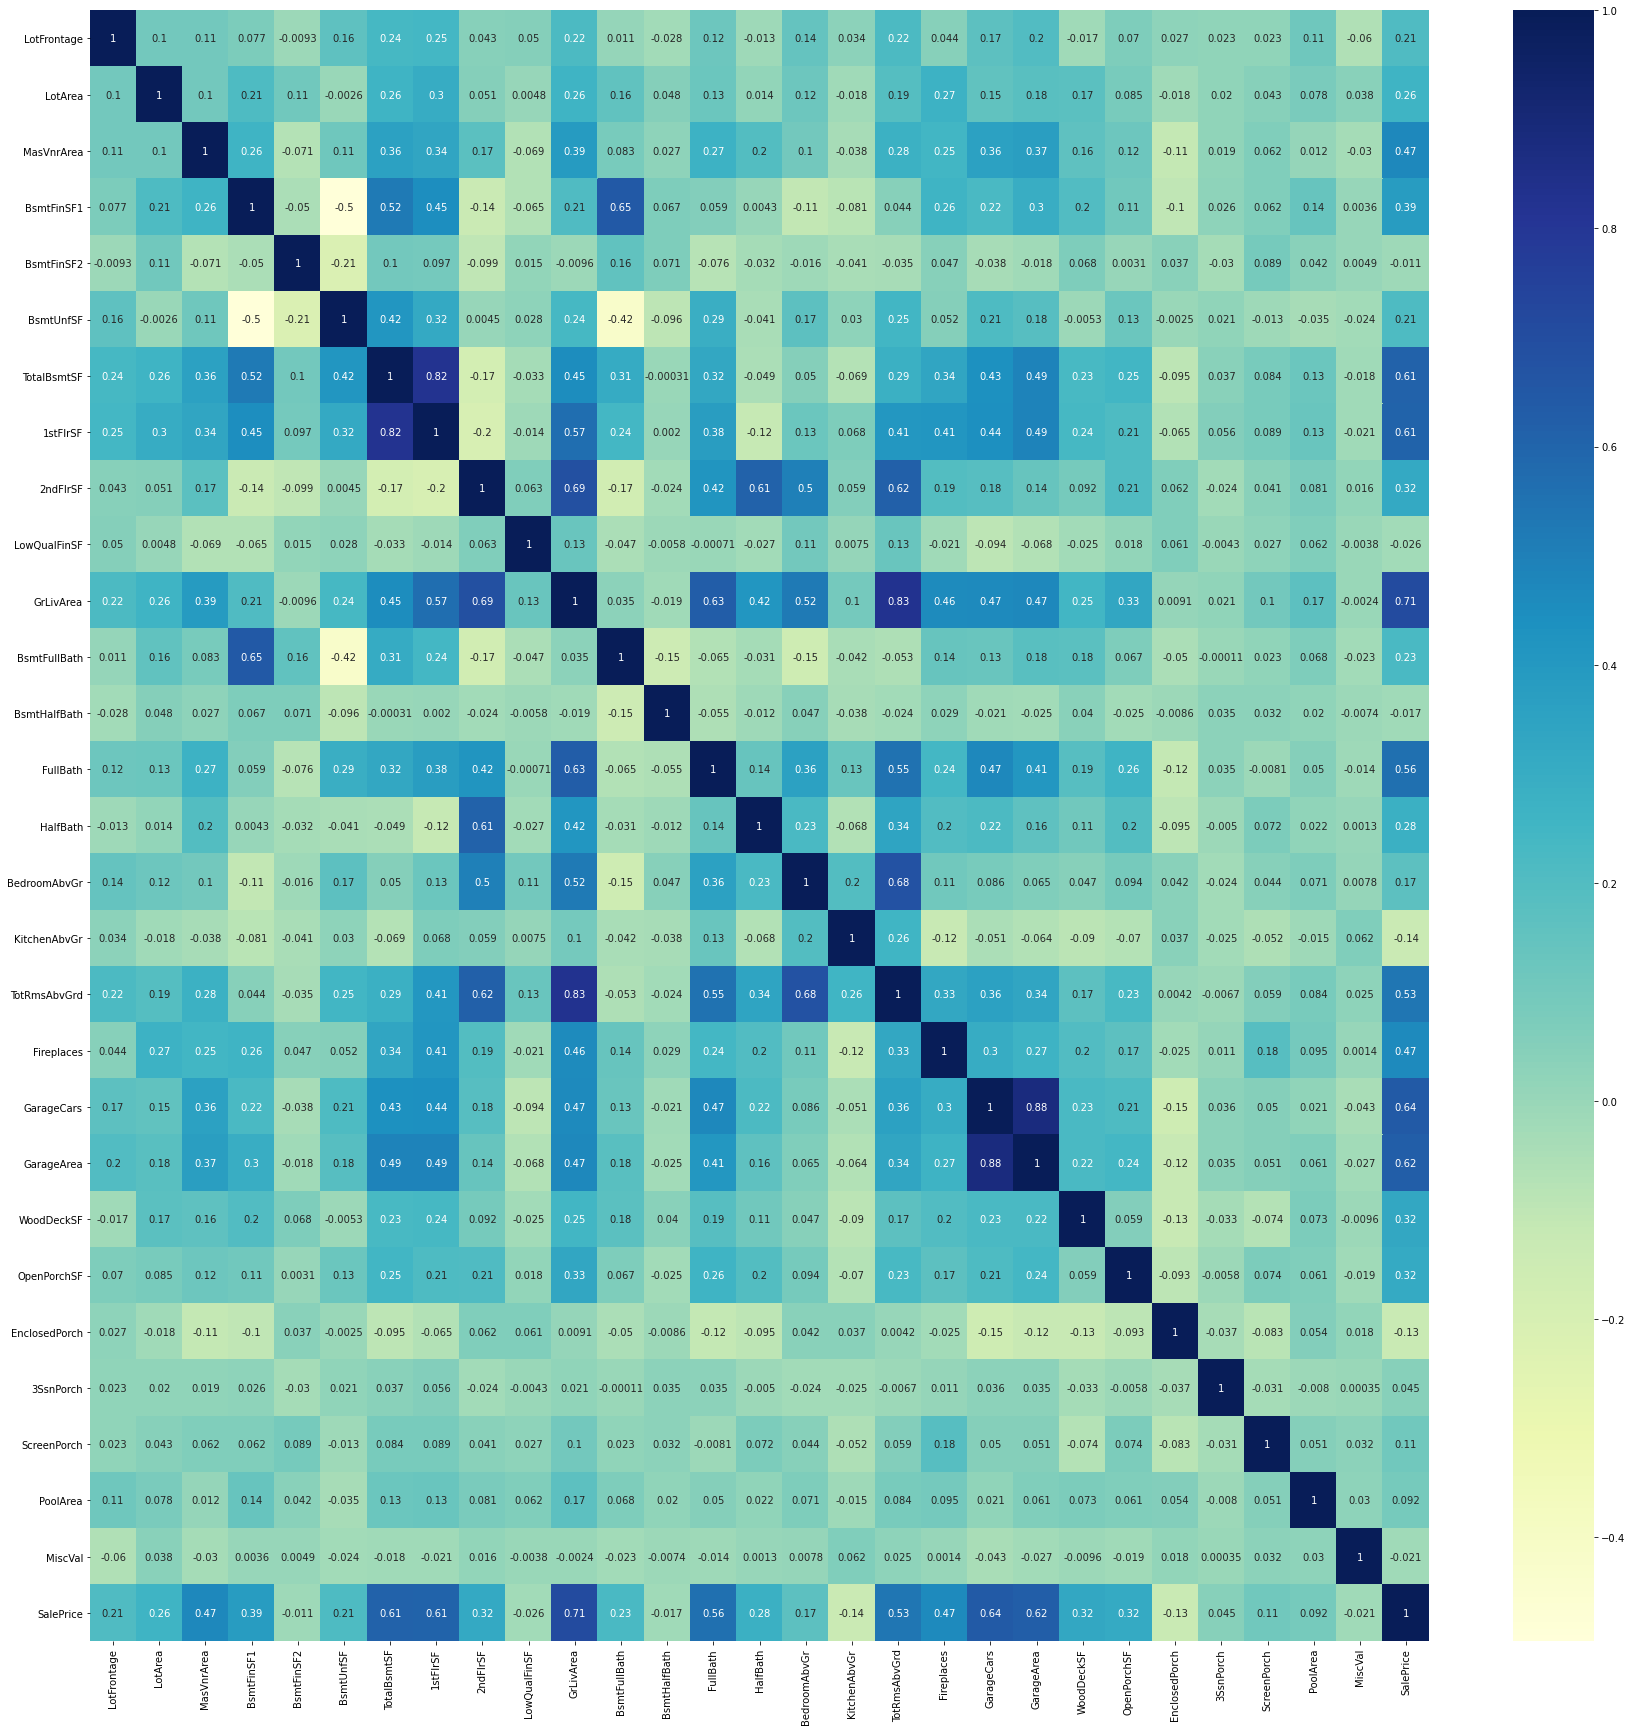

In [24]:
##Plotting a heatmap to see the highest numerical column influence is by which column

plt.figure(figsize=(30,30))

# heatmap
sns.heatmap(housing_numeric_cols.corr(), cmap="YlGnBu", annot=True)
plt.show()

> ### Looking at the SalePrice (our target column), we can say that below variables are positively highly correlated: 
>- GrLivArea (Above grade (ground) living area), 
>- GarageCars (Size of garage in car capacity), 
>- GarageArea (Size of garage), 
>- TotalBsmtSF (Total square feet of basement area), 
>- 1stFlrSF (First Floor square feet),
>- FullBath (Full bathrooms above grade),
>- TotRmsAbvGrd (Total rooms above grade),
>- MasVnrArea (Masonry veneer area in square feet),
>- Fireplaces (Number of fireplaces),
>- BsmtFinSF1 (Type 1 finished square feet),
>- 2ndFlrSF (Second floor square feet),
>- WoodDeckSF (Wood deck area in square feet),
>- OpenPorchSF (Open porch area in square feet)
>- HalfBath (Half baths above grade)
>- LotArea (Lot size in square feet)
>- BsmtFullBath (Basement full bathrooms)
>- BsmtUnfSF (Unfinished square feet of basement area)
>- LotFrontage (Linear feet of street connected to property)

In [25]:
## Getting categorical columns
housing.select_dtypes(include=['object']).info()
categorical_columns = housing.select_dtypes(include=['object']).columns
categorical_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  YearBuilt      1460 non-null   object
 16  YearRemodAdd   1460 non-null   object
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Let's see the Categorical data Graphical representations

In [26]:
## Defining Function for univariate feature analysis using barplot
def univariateAnalysis(feature):
    avgSalePriceFeature = housing[[feature, 'SalePrice']].groupby(feature).mean().sort_values(by='SalePrice',ascending=False)
    print("Average SalePrice across "+feature+":\n",avgSalePriceFeature)
    g = sns.barplot(x=feature, y='SalePrice', data=housing, log=True)
    g.set_title("Average SalePrice across "+feature)


In [27]:
##Analysising the median values of SalePrice for univariate feature
def medianAnalysis(feature):
    medianSalePriceFeature = housing[[feature, 'SalePrice']].groupby(feature).median().sort_values(by='SalePrice',ascending=False)
    print("Average SalePrice across "+feature+":\n",medianSalePriceFeature)
    g = sns.boxplot(x=feature, y='SalePrice', data=housing)
    g.set_title("Median SalePrice across "+feature)
    plt.yscale('log')
    plt.show()

Average SalePrice across MSZoning:
               SalePrice
MSZoning               
FV        214014.061538
RL        191004.994787
RH        131558.375000
RM        126316.830275
C (all)    74528.000000


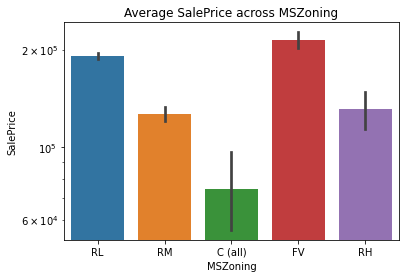

In [28]:
## Analyzing MSZoning feature which Identifies the general zoning classification of the sale.
univariateAnalysis('MSZoning')

> Looking at graph above, we can say that highest SalePrice is for <b>Residential Projects, be it Residential with Low Density, Residential with High Density, Residential with Medium Density, Floating Village Residential</b>

Average SalePrice across MSSubClass:
                 SalePrice
MSSubClass               
60          239948.501672
120         200779.080460
75          192437.500000
20          185224.811567
80          169736.551724
70          166772.416667
40          156125.000000
85          147810.000000
50          143302.972222
160         138647.380952
90          133541.076923
190         129613.333333
45          108591.666667
180         102300.000000
30           95829.724638


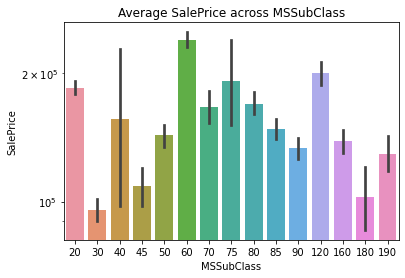

In [29]:
## Analyzing MSSubClass feature which identifies the type of dwelling involved in the sale.
univariateAnalysis('MSSubClass')

> Looking the the graph above, we can say that, <b>MSSubClass 60 i.e. 2-STORY 1946 & NEWER </b> have the highest average SalePrice

Average SalePrice across Street:
             SalePrice
Street               
Pave    181130.538514
Grvl    130190.500000


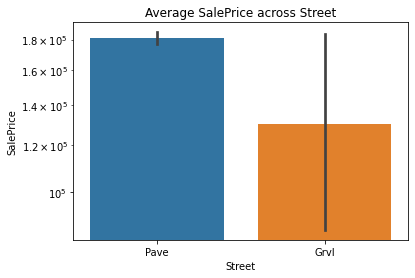

In [30]:
## Analyzing average sales across Street
univariateAnalysis('Street')

> Looking at the graph, we can say that Street does not have a significant difference in the Sale Price

Average SalePrice across LotShape:
               SalePrice
LotShape               
IR2       239833.365854
IR3       216036.500000
IR1       206101.665289
Reg       164754.818378


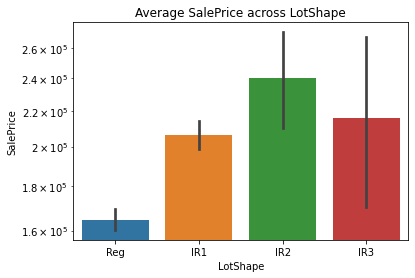

In [31]:
## Analyzing average sales across LotShape
univariateAnalysis('LotShape')

> Looking at the graph, we can say that <b>Moderately Irregular LotShape</b> is having an higher SalePrice then Other LotShapes

Average SalePrice across Utilities:
               SalePrice
Utilities              
AllPub     180950.95682
NoSeWa     137500.00000


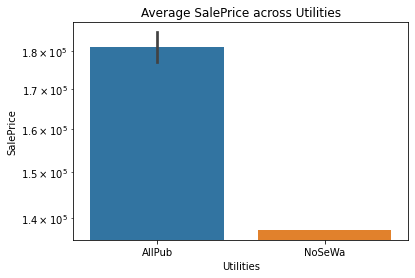

In [32]:
## Analyzing the Utilities feature against the SalePrice
univariateAnalysis('Utilities')

> Looking at the graph, we can say that SalePrice is high where <b>All Public Utilities</b> are available

Average SalePrice across LotConfig:
                SalePrice
LotConfig               
CulDSac    223854.617021
FR3        208475.000000
Corner     181623.425856
FR2        177934.574468
Inside     176938.047529


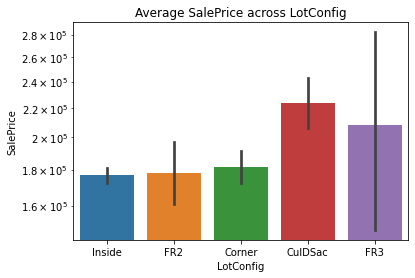

In [33]:
## Analysing the LotConfig feature against the SalesPrice

univariateAnalysis('LotConfig')

> Looking at the graph above, we can say that <b> Cull-de-sac Lot Configuration</b> has higher Sale Price then the Others

Average SalePrice across Neighborhood:
                   SalePrice
Neighborhood               
NoRidge       335295.317073
NridgHt       316270.623377
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273
Somerst       225379.837209
ClearCr       212565.428571
Crawfor       210624.725490
CollgCr       197965.773333
Blmngtn       194870.882353
Gilbert       192854.506329
NWAmes        189050.068493
SawyerW       186555.796610
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
SWISU         142591.360000
Blueste       137500.000000
Sawyer        136793.135135
OldTown       128225.300885
Edwards       128219.700000
BrkSide       124834.051724
BrDale        104493.750000
IDOTRR        100123.783784
MeadowV        98576.470588


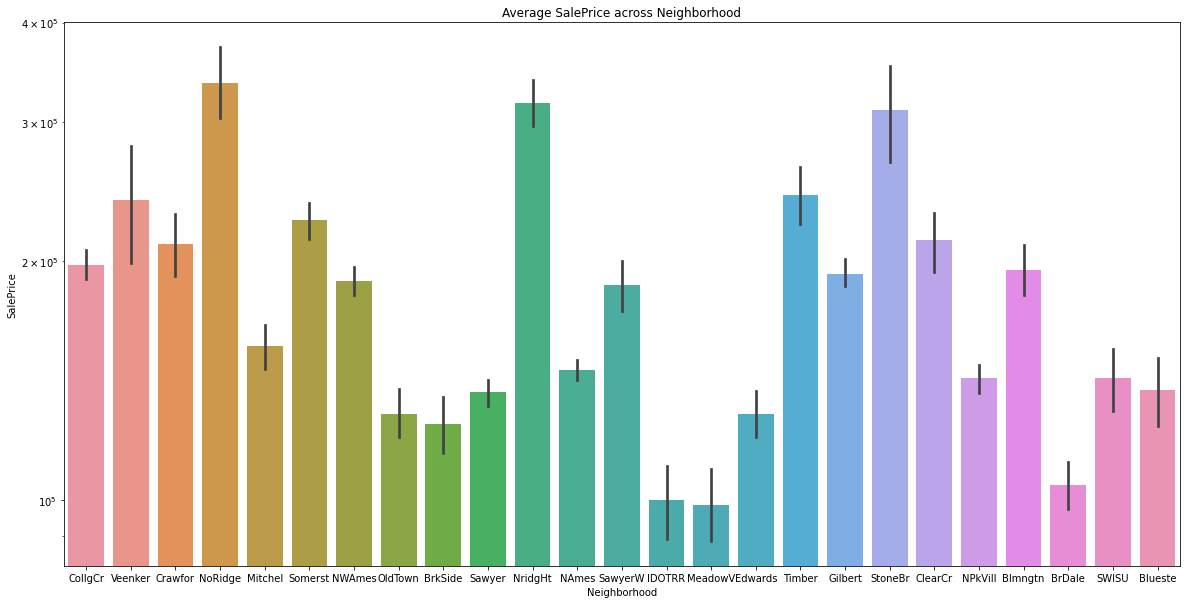

In [34]:
## Analysing Neighborhood feature against the SalePrice
plt.figure(figsize=(20,10))
univariateAnalysis('Neighborhood')

> Looking at the graph above, we can say that <b>Northridge, Northridge Heights</b> in Neighbourhood has highest SalePrice

Average SalePrice across HouseStyle:
                 SalePrice
HouseStyle               
2.5Fin      220000.000000
2Story      210051.764045
1Story      175985.477961
SLvl        166703.384615
2.5Unf      157354.545455
1.5Fin      143116.740260
SFoyer      135074.486486
1.5Unf      110150.000000


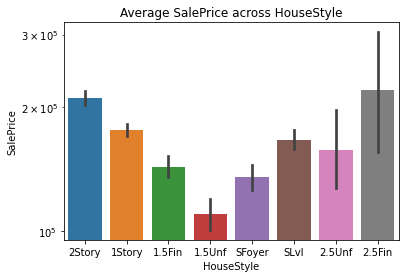

In [35]:
## Analysing HouseStyle feature across SalePrice
univariateAnalysis('HouseStyle')

> Looking at graph above, we can say that <b>2.5Fin i.e. Two and one-half story: 2nd level finished HouseStyle</b> has highest SalePrice across HouseType

Average SalePrice across OverallQual:
                  SalePrice
OverallQual               
10           438588.388889
9            367513.023256
8            274735.535714
7            207716.423197
6            161603.034759
5            133523.347607
4            108420.655172
3             87473.750000
2             51770.333333
1             50150.000000


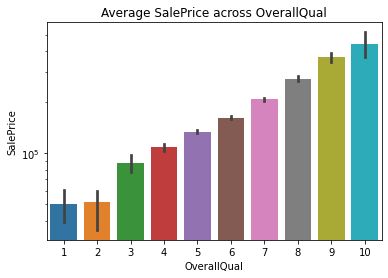

In [36]:
## Analysing OverallQual feature which Rates the overall material and finish of the house with the SalePrice
univariateAnalysis('OverallQual')


> Looking at the graph above, we can say that SalePrice of the house is linearly increasing according to the OverallQual of the Lot. <b>Very Excellent Overall Quality Lots</b> have highest Sale Price

Average SalePrice across OverallCond:
                  SalePrice
OverallCond               
9            216004.545455
5            203146.914738
7            158145.487805
8            155651.736111
6            153961.591270
2            141986.400000
4            120438.438596
3            101929.400000
1             61000.000000


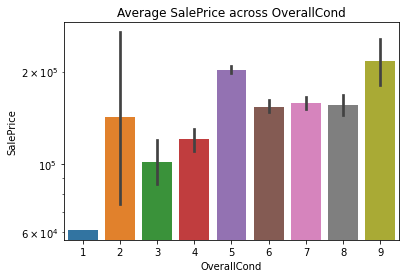

In [37]:
## Analysing the OverallCond which Rates the overall condition of the house across the SalePrice
univariateAnalysis('OverallCond')

> Looking at the graph above, we can say that the Lots with Overall Condition aboverage average has good Sale Price

Average SalePrice across YearBuilt:
                SalePrice
YearBuilt               
2010       394432.000000
2008       348849.130435
1893       325000.000000
1892       291250.000000
1989       279500.000000
...                  ...
1924       105985.714286
1930       103588.888889
1875        94000.000000
1913        90350.000000
1927        82666.666667

[112 rows x 1 columns]


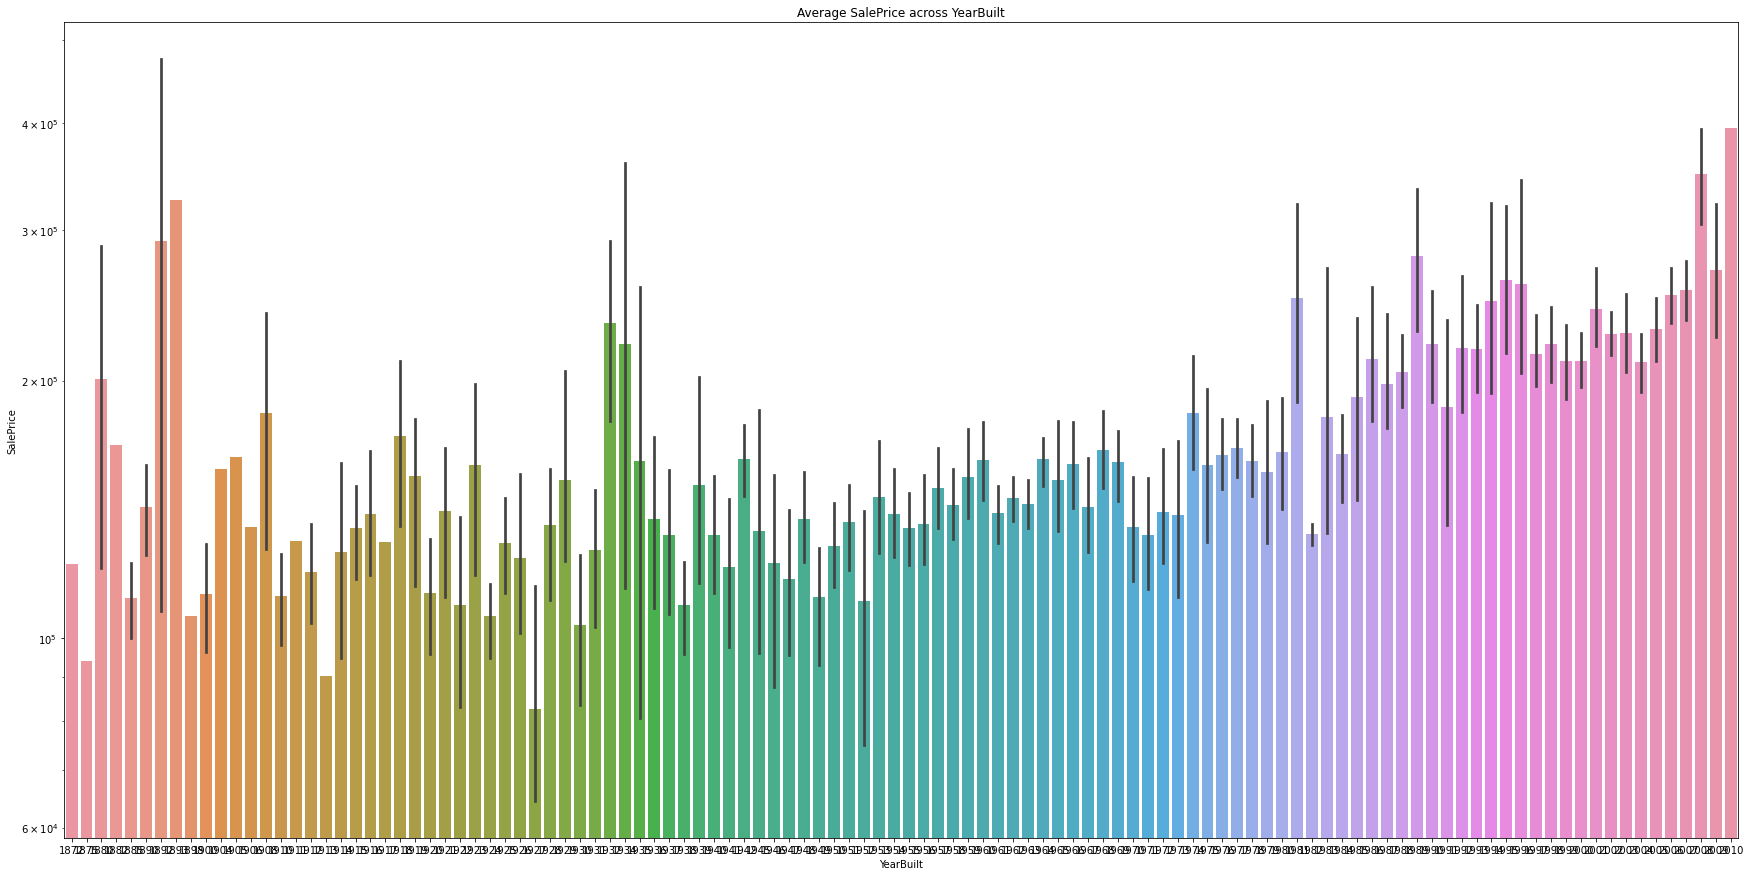

In [38]:
## Analysing the feature YearBuilt across the SalePrice
plt.figure(figsize=(30,15))
univariateAnalysis('YearBuilt')

> Looking at the graph above, we can say that Newer Built Plots has higher price then the Older Built Plots

Average SalePrice across YearRemodAdd:
                   SalePrice
YearRemodAdd               
2010          336963.500000
2009          284085.391304
2008          269709.100000
2006          229471.134021
2007          224807.250000
...                     ...
1982          121271.428571
1954          121142.857143
1971          120230.555556
1950          117463.056180
1952          110398.600000

[61 rows x 1 columns]


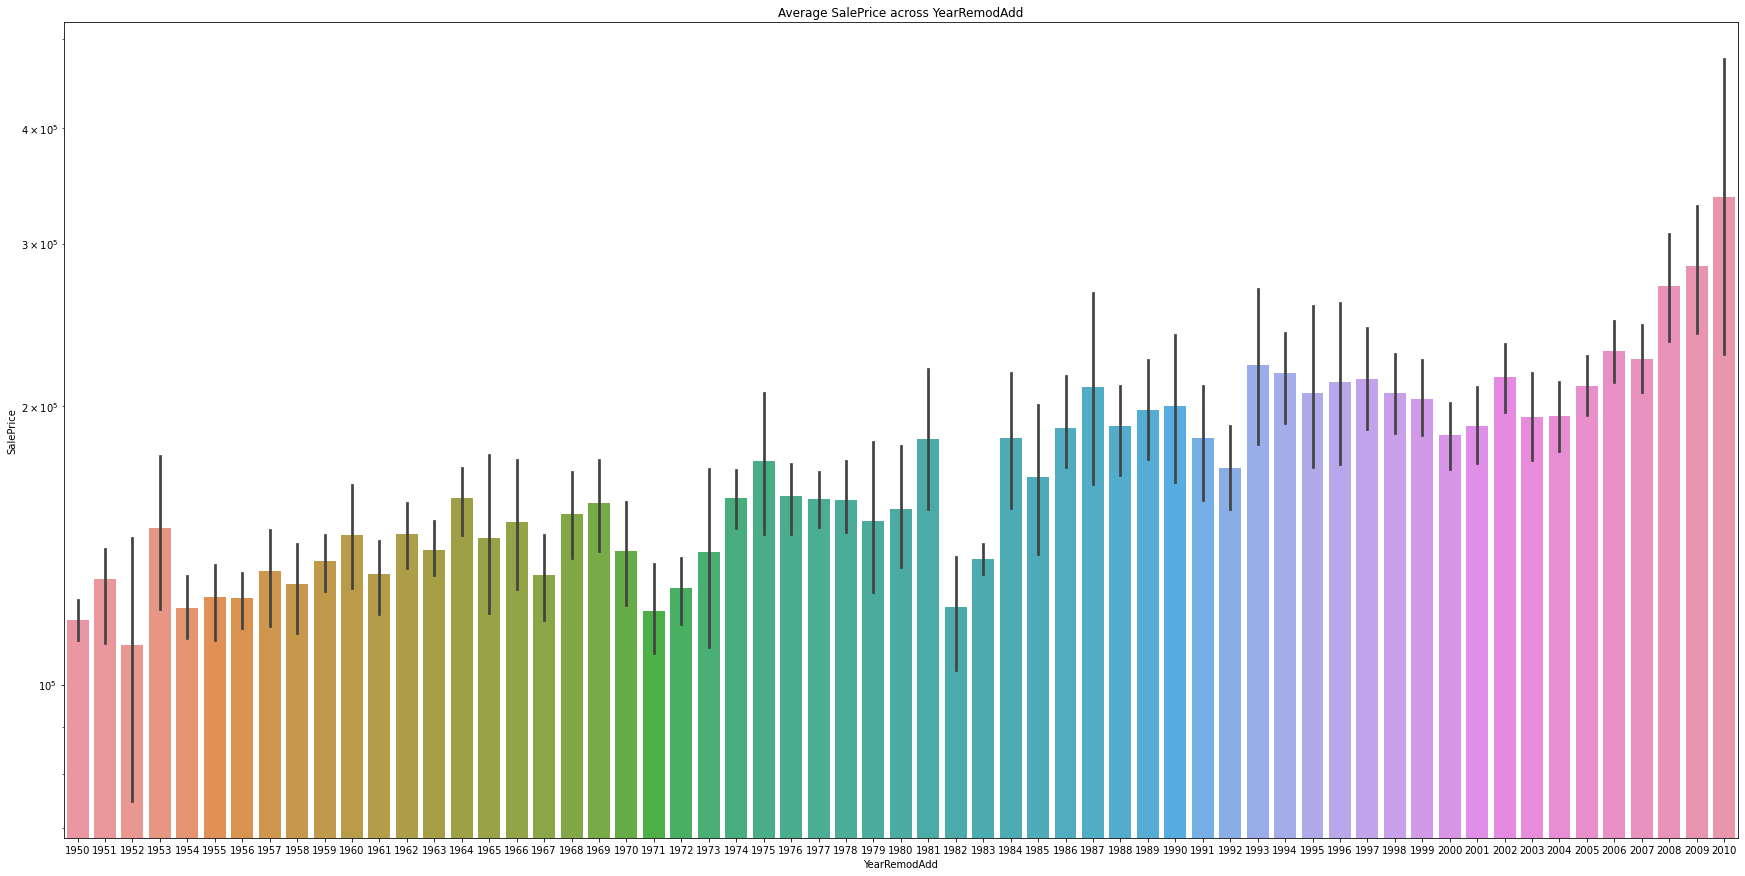

In [39]:
## Analyzing the YearRemodAdd feature - Remodel date (same as construction date if no remodeling or additions)
plt.figure(figsize=(30,15))
univariateAnalysis('YearRemodAdd')

Average SalePrice across YrsBetRemodNBuilt:
                    SalePrice
YrsBetRemodNBuilt           
101                 475000.0
64                  359100.0
107                 325000.0
122                 295000.0
6                   278000.0
...                      ...
110                 100000.0
75                   98300.0
86                   98000.0
94                   96500.0
121                  94000.0

[109 rows x 1 columns]


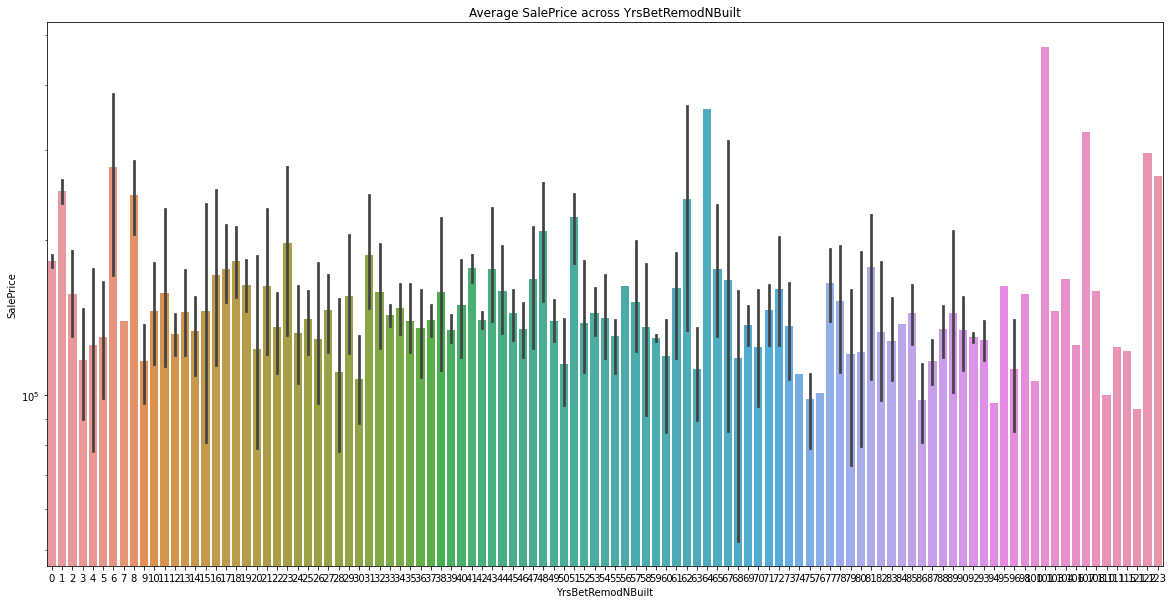

In [40]:
##Adding one more features which will show 
## no of years between year of construction and remodel added

housing['YrsBetRemodNBuilt'] = np.where(housing['YearBuilt'] == housing['YearRemodAdd'], 0, housing['YearRemodAdd'] - housing['YearBuilt'])


##Analyzing the SalePrice with the Newly created Feature which Signifies the No of years between built and Remodelled
plt.figure(figsize=(20,10))
univariateAnalysis('YrsBetRemodNBuilt')

> Looking at graph above, we can say that the latest remodelled buildings have high SalePrice

In [41]:
## Since the Years Between Remodelled and Built is continous numerical feature, we need to check its correaltion with SalePrice Param
housing['YrsBetRemodNBuilt'] = housing['YrsBetRemodNBuilt'].astype('int64')
housing['YrsBetRemodNBuilt'].corr(housing['SalePrice'])

-0.2175033152200016

> Looking at the above Correlation value, wecan say that the Years Between the Built and Remodelled Year does not have significant impact on the SalePrice. Hence can be dropped

In [42]:
##Dropping column 'YrsBetRemodNBuilt'
housing= housing.drop(['YrsBetRemodNBuilt'], axis=1)

Average SalePrice across ExterQual:
                SalePrice
ExterQual               
Ex         367360.961538
Gd         231633.510246
TA         144341.313466
Fa          87985.214286


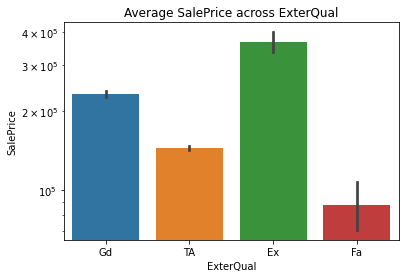

In [43]:
## Analyzing the feature ExterQual
univariateAnalysis('ExterQual')

> Looking at the graph above, we can say that Plots with Excellent quality Exterior has high SalePrice

Average SalePrice across Foundation:
                 SalePrice
Foundation               
PConc       225230.442040
Wood        185666.666667
Stone       165959.166667
CBlock      149805.714511
BrkTil      132291.075342
Slab        107365.625000


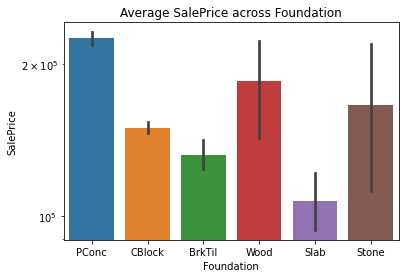

In [44]:
## Analyzing the feature Foundation 
univariateAnalysis('Foundation')

> Looking at the graph above, we can say that Foundation does not have significant difference in SalePrice

Average SalePrice across BsmtQual:
               SalePrice
BsmtQual               
Ex        327041.041322
Gd        202688.478964
TA        140759.818182
Fa        115692.028571
Absent    105652.891892


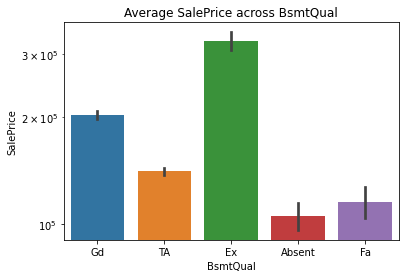

In [45]:
## Analyzing the feature BsmtQual
univariateAnalysis('BsmtQual')

> Looking at the graph above, we can say that the Plots with Excellent Basement Quality has High SalePrice

Average SalePrice across Functional:
                 SalePrice
Functional               
Typ         183429.147059
Mod         168393.333333
Maj1        153948.142857
Min1        146385.483871
Min2        144240.647059
Sev         129000.000000
Maj2         85800.000000


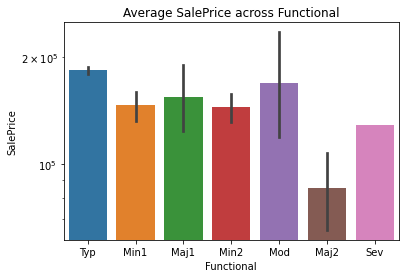

In [46]:
## Analyzing the feature Functional which identifies Home functionality 

univariateAnalysis('Functional')

> Looking at the graph above, we can say that the Typically Functional Houses are having more SalePrice then Others and also it does have high variance across Home Functionality

Average SalePrice across GarageType:
                 SalePrice
GarageType               
BuiltIn     254751.738636
Attchd      202892.656322
Basment     160570.684211
2Types      151283.333333
Detchd      134091.162791
CarPort     109962.111111
Absent      103317.283951


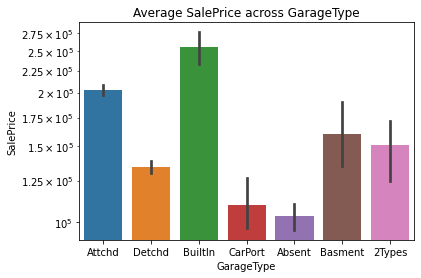

In [47]:
## Analyzing the feature GarageType

univariateAnalysis('GarageType')

> Looking at the graph above, we can say that the Houses with <b>BuiltIn Garage</b> have higher SalePrice compared to others

Average SalePrice across GarageQual:
                 SalePrice
GarageQual               
Ex          241000.000000
Gd          215860.714286
TA          187489.836003
Fa          123573.354167
Absent      103317.283951
Po          100166.666667


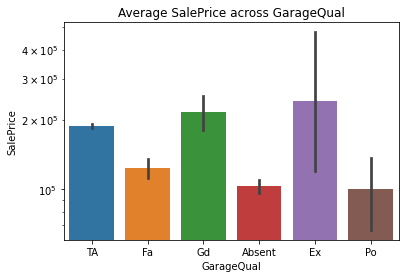

In [48]:
## Analyzing the feature GarageQual
univariateAnalysis('GarageQual')

> Looking at the graph above, we can say that <b>Garage with Excellent Quality</b> has higher SalePrice then the Others

Average SalePrice across YrSold:
             SalePrice
YrSold               
2007    186063.151976
2006    182549.458599
2009    179432.103550
2010    177393.674286
2008    177360.838816


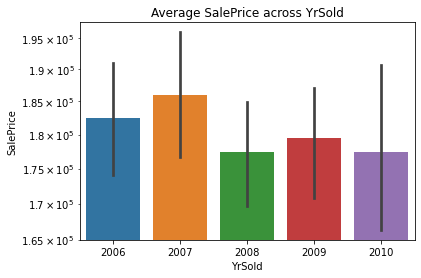

In [49]:
## Analyzing the feature YrSold
univariateAnalysis('YrSold')

> Looking at the graph above, we can say that the average SalePrice of Houses was highest in Year 2007

<AxesSubplot:xlabel='YrSold', ylabel='count'>

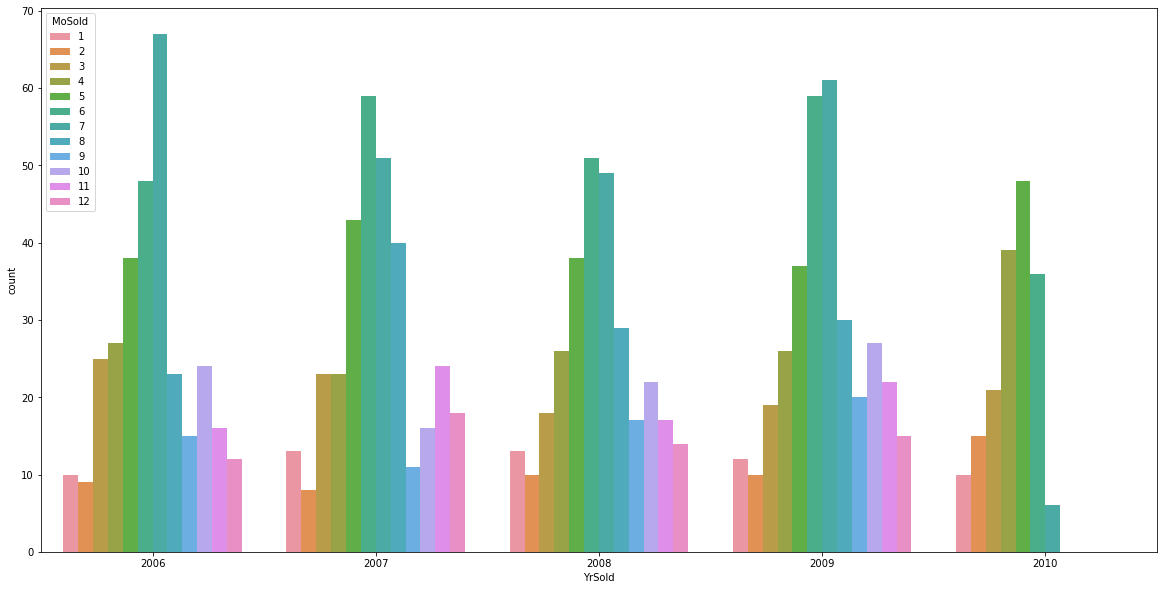

In [50]:
## Also Analyzing the Counts of Sales in Each Year
plt.figure(figsize=(20,10))
sns.countplot(x='YrSold',hue='MoSold', data=housing)

> Looking at the graph above, we can infer that :
>- the maximum Sales in this Dataset if of 2006 and 2007,
>- the maximum Sales happens in Mid of Year i.e. from May to July
>- the data Seems to have records startng from 2006 to mid of 2010. This might e the reson for the low no of Sales in 2010

Average SalePrice across SaleType:
               SalePrice
SaleType               
New       274945.418033
Con       269600.000000
CWD       210600.000000
ConLI     200390.000000
WD        173401.836622
COD       143973.255814
ConLw     143700.000000
ConLD     138780.888889
Oth       119850.000000


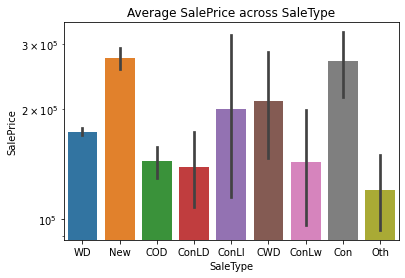

In [51]:
## Analyzing the feature SaleType 
univariateAnalysis('SaleType')

> Looking at the graph above, we can say that the <b>New type i.e. the Home just constructed and sold</b> have high SalePrice then the Others 

Average SalePrice across SaleCondition:
                    SalePrice
SaleCondition               
Partial        272291.752000
Normal         175202.219533
Alloca         167377.416667
Family         149600.000000
Abnorml        146526.623762
AdjLand        104125.000000


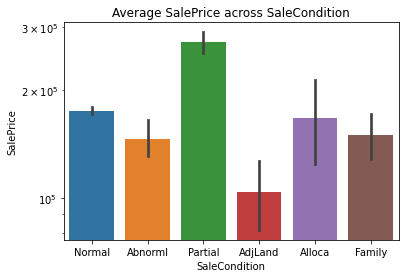

In [52]:
## Analyzing the feature SaleCondition
univariateAnalysis('SaleCondition')

> Looking at the graph above, we can say that the <b>Partial Condition i.e. Home was not completed when last assessed (associated with New Homes)</b> have high SalePrice compared to Others

### Let's Create Dummy Variables for categorical variables

In [55]:
## Let's check the categorical columns where dummies will be required

categorical_columns

##Removing year and datetime type of columns from categorical as the dummies won't be required for this columns
categorical_dummies_columns= categorical_columns.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'])

In [56]:
## Creating dummy variables for categorical data

categorical_dummies = pd.get_dummies(housing[categorical_dummies_columns], drop_first=True)
categorical_dummies

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
## Concatenating the dummy variables to the main data

housing = pd.concat([housing,categorical_dummies], axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [58]:
## Dropping categorical columns for which dummies are created

housing = housing.drop(categorical_columns, axis=1)
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
##Checking housing column info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 266 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(27), uint8(237)
memory usage: 668.8 KB


### Step 4. Data Preparation

In [161]:
## Creating X and y for Applying Regression Over It
X = housing.loc[:, housing.columns != 'SalePrice']
y = np.log(housing.SalePrice)

In [162]:
## Checking X data
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [172]:
## Checking y data
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [223]:
## Creating training and test data split 

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

### Step 4. Model Creation
>#### Will try overfitting the model using all features and then fine tune features using Lasso regression

#### Scaling the data on numeric features 


In [224]:
numeric_columns = X_train.select_dtypes(include=['int64','float']).columns
numeric_columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [225]:
##Scaling numeric columns using StandardScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_train[numeric_columns]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
210,0.214058,0.019306,0.000000,0.082920,0.000000,0.169521,0.141408,0.113889,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.173913,0.000000,0.000000,0.000000,0.000000
318,0.287540,0.039403,0.160000,0.174876,0.000000,0.154110,0.220458,0.231481,0.616949,0.000000,...,0.333333,0.75,0.462623,0.396733,0.114723,0.260870,0.000000,0.000000,0.000000,0.000000
239,0.166134,0.033981,0.000000,0.016655,0.000000,0.274401,0.120295,0.098611,0.333656,0.000000,...,0.333333,0.25,0.155148,0.000000,0.267686,0.000000,0.000000,0.000000,0.000000,0.000000
986,0.188498,0.017931,0.000000,0.000000,0.000000,0.207620,0.079378,0.145602,0.307022,0.000000,...,0.000000,0.25,0.179831,0.459743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1416,0.191693,0.046139,0.000000,0.000000,0.000000,0.332620,0.127169,0.202315,0.505569,0.000000,...,0.000000,0.50,0.394922,0.000000,0.000000,0.206522,0.000000,0.000000,0.000000,0.000000
390,0.159744,0.032409,0.000000,0.042700,0.265265,0.098031,0.140917,0.136343,0.196610,0.000000,...,0.000000,0.25,0.270804,0.000000,0.248566,0.202899,0.000000,0.000000,0.000000,0.000000
1005,0.207668,0.032315,0.137500,0.105422,0.000000,0.166952,0.161211,0.141898,0.000000,0.000000,...,0.000000,0.25,0.231312,0.245041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
568,0.252396,0.050756,0.000000,0.255315,0.000000,0.023545,0.244845,0.260185,0.307990,0.000000,...,0.333333,0.50,0.431594,0.407235,0.076482,0.000000,0.000000,0.000000,0.000000,0.000000
342,0.000000,0.033059,0.212500,0.000000,0.000000,0.000000,0.000000,0.154630,0.000000,0.000000,...,0.000000,0.50,0.282087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
114,0.194888,0.027048,0.000000,0.137137,0.101764,0.044521,0.168249,0.246296,0.428087,0.000000,...,0.333333,0.25,0.126939,0.261377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [226]:
## Reshaping y for model creation

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
print(y_train.shape)
print(y_test.shape)

(1021, 1)
(438, 1)


In [227]:
##Creating a model using all features 
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [228]:
## Evaluate the test score for this overfitted model
from sklearn.metrics import r2_score, mean_squared_error

In [229]:
## Evaluate the test score for this overfitted model
y_pred_train = lm.predict(X_train)
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9593137792393442
-6757298224658071.0
6.5298228005658
4.869888271372926e+17
0.006395516944726542
1111846637299754.9


#### Residual Analysis for Linear Regression Model

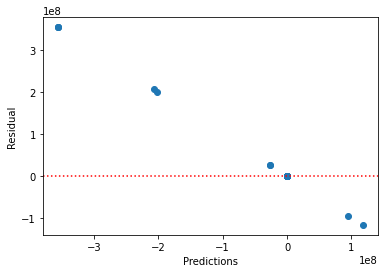

In [230]:
# Residual analysis for Linear Regression

y_res_test = y_test - y_pred_test
y_res_test = y_res_test.reshape(-1,)
data = pd.DataFrame()
data['res'] = y_res_test
plt.scatter( y_pred_test , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

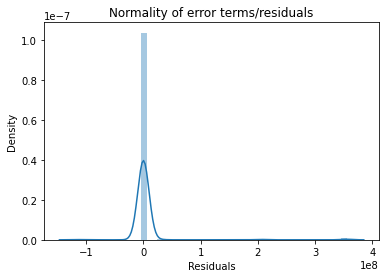

In [231]:
# Distribution of errors
p = sns.distplot(y_res_test,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [232]:
## Creating an model using Lasso Regression by taking hyperparameters factors as below
params = {'alpha': [ 0.0003,0.001, 0.005,0.01, 0.05, 0.1, 
  0.5, 1.0, 2.0,5.0, 10.0, 20, 50,100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0003, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                   1.0, 2.0, 5.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [233]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [234]:
## Creating a Model with Best Param for Lasso
alpha =0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0003)

In [106]:
lasso.coef_

array([-1.61781569e-04,  1.39642455e-06,  4.68526474e-06,  8.60783688e-07,
        4.40474330e-05,  1.75540322e-05,  1.11115516e-05,  2.09763602e-04,
        2.25123167e-04,  7.26299725e-05,  2.74116738e-05,  4.73738100e-02,
        1.26643546e-02,  4.95742778e-02,  2.70408302e-02,  4.09074370e-03,
       -9.55834732e-02,  5.14407923e-03,  2.42091547e-02,  6.53342559e-02,
       -2.48164343e-05,  9.00832605e-05,  3.68028524e-05,  7.89697861e-05,
        2.44607140e-04,  1.99205991e-04, -3.95509926e-04,  1.19885953e-06,
       -1.21085434e-01, -0.00000000e+00, -0.00000000e+00, -3.75233634e-03,
       -2.79131687e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.02733102e-03, -0.00000000e+00, -4.01680435e-02,
       -0.00000000e+00, -1.04239776e-02,  1.53140527e-01,  1.67948708e-01,
        1.61583517e-01,  1.14545465e-01,  0.00000000e+00,  2.11122009e-02,
       -3.35722016e-02,  7.49193556e-03,  1.78548899e-02,  2.03890142e-02,
        3.54827071e-02, -

In [235]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for Lasso Model

y_pred_train = lasso.predict(X_train)
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9291563747947625
-0.7550208245980723
310574.10975601926
87872.78926605993
0.011135996338693848
0.2887713309884512


### Let's Create Ridge Model

In [239]:

params = {'alpha': [ 0.0001,0.001,0.01, 0.05, 0.1, 
  0.5, 1.0, 2.0, 10.0, 20, 50,100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   2.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [240]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [241]:
## Creating a Model with Best Param for Ridge
alpha =10

ridge1 = Ridge(alpha=alpha)
        
ridge1.fit(X_train, y_train)

Ridge(alpha=10)

In [242]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for Ridge Model

y_pred_train = ridge1.predict(X_train)
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
y_pred_test = ridge1.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9138349497747661
-0.6660047920991174
13.828822118487686
120.06658471115686
0.013544389929958557
0.274124622628212


In [243]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

ls_metric = pd.Series(metric2, name = 'Lasso Regression')
rg_metric = pd.Series(metric3, name = 'Ridge Regression')


final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.593138e-01,0.913835,0.929156
1,R2 Score (Test),-6.757298e+15,-0.666005,-0.755021
2,RSS (Train),6.529823e+00,13.828822,310574.109756
3,RSS (Test),4.869888e+17,120.066585,87872.789266
4,MSE (Train),7.997198e-02,0.116380,0.105527
5,MSE (Test),3.334436e+07,0.523569,0.537374


> Looking at the results above, we can say that the <b>Lasso Regression Model</b> performs much better on the Test Data then the other model

### Lets observe the changes in the coefficients after regularization

In [244]:
betas = pd.DataFrame(index=X_train.columns)

In [245]:
betas.rows = X_train.columns

In [246]:
betas['Linear'] = lm.coef_[0]
betas['Ridge'] = ridge1.coef_[0]
betas['Lasso'] = lasso.coef_

In [247]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
LotFrontage,8.318120e-03,-0.009926,-0.008421
LotArea,5.998534e-01,0.053388,0.071159
MasVnrArea,3.406363e-02,0.043388,0.000000
BsmtFinSF1,-1.070923e+09,0.045396,-0.000000
BsmtFinSF2,-2.796847e+08,0.043709,0.002743
BsmtUnfSF,-4.432453e+08,0.079553,0.033243
TotalBsmtSF,1.159344e+09,0.082893,0.000000
1stFlrSF,1.705687e+09,0.151597,0.000000
2ndFlrSF,8.153340e+08,0.139196,0.005634
LowQualFinSF,2.033400e+08,0.008455,-0.018804


In [248]:
##Double the alpha value for Ridge and Lasso and check the predictions
ridgeAlpha = 20
lassoAlpha = 0.006

## creation of ridge model using ridgeAlpha
ridge_doublealphamodel = Ridge(ridgeAlpha)
ridge_doublealphamodel.fit(X_train, y_train)
y_pred_ridge_train = ridge_doublealphamodel.predict(X_train)

y_pred_ridge_test = ridge_doublealphamodel.predict(X_test)


r2_ridge_train_lr = r2_score(y_train, y_pred_ridge_train)
print('R2 score for train data for ridge model with alpha 20: ' ,r2_ridge_train_lr)


r2_ridge_test_lr = r2_score(y_test, y_pred_ridge_test)
print('R2 score for test data for ridge model with alpha 20: ',r2_test_lr)

rss1_ridge_train_lr = np.sum(np.square(y_train - y_pred_ridge_train))
print('RSS for train data for ridge model with alpha 20: ',rss1_ridge_train_lr)

rss2_ridge_test_lr = np.sum(np.square(y_test - y_pred_ridge_test))
print('RSS for test data for ridge model with alpha 20: ',rss2_ridge_test_lr)


mse_ridge_train_lr = mean_squared_error(y_train, y_pred_ridge_train)
print('MSE for test data for ridge model with alpha 20: ',mse_ridge_train_lr)


mse_ridge_test_lr = mean_squared_error(y_test, y_pred_ridge_test)
print('MSE for test data for ridge model with alpha 20: ',mse_ridge_test_lr)

##Betas for Ridge with Double Alpha
betas['Ridge_DoubleAlpha'] = ridge_doublealphamodel.coef_[0]

##Top 5 features with doubled alpha values for Ridge
betas['Ridge_DoubleAlpha'].sort_values(ascending=False).head(5)

R2 score for train data for ridge model with alpha 20:  0.9003031907955172
R2 score for test data for ridge model with alpha 20:  -0.6660047920991174
RSS for train data for ridge model with alpha 20:  16.000564459322298
RSS for test data for ridge model with alpha 20:  100.02561393248489
MSE for test data for ridge model with alpha 20:  0.01567146372117757
MSE for test data for ridge model with alpha 20:  0.22836898158101573


TotRmsAbvGrd    0.143155
GrLivArea       0.141422
FullBath        0.137661
Fireplaces      0.119821
GarageCars      0.119252
Name: Ridge_DoubleAlpha, dtype: float64

In [249]:
## Top 5 Features Ridge
betas.Ridge.sort_values(ascending=False).head(5)

GrLivArea       0.181916
TotRmsAbvGrd    0.160717
FullBath        0.160415
1stFlrSF        0.151597
2ndFlrSF        0.139196
Name: Ridge, dtype: float64

In [207]:
## creation of lasso model using lassoAlpha
lasso_doublealphamodel = Lasso(lassoAlpha)
lasso_doublealphamodel.fit(X_train, y_train)
y_pred_lasso_train = lasso_doublealphamodel.predict(X_train)

y_pred_lasso_test = lasso_doublealphamodel.predict(X_test)


r2_lasso_train_lr = r2_score(y_train, y_pred_lasso_train)
print('R2 score for train data for lasso model with alpha 20: ' ,r2_lasso_train_lr)


r2_lasso_test_lr = r2_score(y_test, y_pred_lasso_test)
print('R2 score for test data for lasso model with alpha 20: ',r2_lasso_test_lr)

rss1_lasso_train_lr = np.sum(np.square(y_train - y_pred_lasso_train))
print('RSS for train data for lasso model with alpha 20: ',rss1_lasso_train_lr)

rss2_lasso_test_lr = np.sum(np.square(y_test - y_pred_lasso_test))
print('RSS for test data for lasoo model with alpha 20: ',rss2_lasso_test_lr)


mse_lasso_train_lr = mean_squared_error(y_train, y_pred_lasso_train)
print('MSE for test data for ridge model with alpha 20: ',mse_lasso_train_lr)


mse_lasso_test_lr = mean_squared_error(y_test, y_pred_lasso_test)
print('MSE for test data for ridge model with alpha 20: ',mse_lasso_test_lr)

##Betas for Ridge with Double Alpha
betas['Lasso_DoubleAlpha'] = lasso_doublealphamodel.coef_

##Top 5 features with doubled alpha values for Ridge
betas['Lasso_DoubleAlpha'].sort_values(ascending=False).head(5)

R2 score for train data for lasso model with alpha 20:  0.8117106691544668
R2 score for test data for lasso model with alpha 20:  -0.4806688536181405
RSS for train data for lasso model with alpha 20:  267980.64566012385
RSS for test data for lasoo model with alpha 20:  73481.2817519424
MSE for test data for ridge model with alpha 20:  0.029597430860384008
MSE for test data for ridge model with alpha 20:  0.24362942571372398


GrLivArea       0.320280
GarageCars      0.268759
TotRmsAbvGrd    0.214418
Fireplaces      0.199478
BsmtQual_Ex     0.167654
Name: Lasso_DoubleAlpha, dtype: float64

In [250]:
## Top 5 Features Lasso
betas.Lasso.sort_values(ascending=False).head(5)

GrLivArea        1.130825
GarageCars       0.225327
OverallQual_9    0.208186
MSZoning_RH      0.175606
MSZoning_RL      0.168300
Name: Lasso, dtype: float64

> ## <i>Surprise Housing</i> should consider buying properties which have the following:
>- ### Higher Living Area Space
>- ### Higher Size of Garage Car Capacity
>- ### Overall Quality as Excellent
>- ### In Residential High Density and Residential Low Desity Zones


In [252]:
#### Checking the top 5 features after dropping the top 5 features of Lasso Model

## Dropping the Top 5 features of Lasso Model and Checking which will be the top features for Lasso Regression
X_train_new = X_train.drop(betas.Lasso.sort_values(ascending=False).head(5).keys(), axis=1)

##Creation Of Lasso Model after dropping top 5 features
lasso_afterTop5FeatureDrop = Lasso(alpha=0.003)
lasso_afterTop5FeatureDrop.fit(X_train_new,y_train)
betas_new = pd.DataFrame(index=X_train_new.columns)
betas_new['lasso_aftrTop5FeatureDrop'] = lasso_afterTop5FeatureDrop.coef_
betas_new['lasso_aftrTop5FeatureDrop'].sort_values(ascending=False).head(5)

TotRmsAbvGrd    0.311299
GarageArea      0.295729
1stFlrSF        0.263056
Fireplaces      0.201001
BsmtQual_Ex     0.177329
Name: lasso_aftrTop5FeatureDrop, dtype: float64